In [2]:
#!pip install pandas
#!pip install scikit-learn
#!pip install folium
#!pip install openpyxl
!pip install matplotlib
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from sklearn.cluster import KMeans
import folium


In [3]:
path=r"C:\Users\hill3\OneDrive\바탕 화면\개인프로젝트\소상공인시장진흥공단_상가(상권)정보_서울_202212.csv"
df=pd.read_csv(path)
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377719,19079387,향나무참숯장어나라,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1138010600100260008026739,NaN,서울특별시 은평구 진흥로 153-4,122837,3396.0,NaN,1,NaN,126.926643,37.609327
377720,19079580,에이치에스컨설팅,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,1132010600106960040003438,NaN,서울특별시 도봉구 방학로6길 38,132852,1342.0,NaN,3,NaN,127.036563,37.664572
377721,19079781,크린에이드,가양역점,F,생활서비스,F02,세탁/가사서비스,F02A01,세탁소/빨래방,S96912,...,1150010400100140003009639,가양우성아파트,서울특별시 강서구 양천로 489,157750,7526.0,상가,1,NaN,126.854188,37.562234
377722,19080385,멍,NaN,D,소매,D09,애견/애완/동물,D09A02,애완동물 미용실,S96995,...,1132010700105810012017146,NaN,서울특별시 도봉구 덕릉로59길 15,132918,1470.0,NaN,NaN,NaN,127.038608,37.640459


In [4]:
drink_mapo=df[df["시군구명"]=='마포구']
drink_mapo=drink_mapo[drink_mapo["상권업종대분류명"]=="음식"]
drink_mapo=drink_mapo.loc[:,('상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명','위도','경도')]
drink_mapo

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,위도,경도
13,L.A.D,음식,한식,한식/백반/한정식,37.550689,126.919845
15,은진이네,음식,한식,한식/백반/한정식,37.551340,126.956164
104,남도식당,음식,한식,한식/백반/한정식,37.548146,126.958699
234,벌떼식당,음식,한식,한식/백반/한정식,37.554604,126.938169
369,본죽비빔밥CAFE마포롯데캐슬점,음식,별식/퓨전요리,죽전문점,37.545112,126.950865
...,...,...,...,...,...,...
377623,후엘고2,음식,커피점/카페,커피전문점/카페/다방,37.547673,126.944039
377643,오드키치맨션,음식,유흥주점,꼬치구이전문점,37.548722,126.916648
377692,서울미트볼,음식,양식,정통양식/경양식,37.577855,126.894490
377693,월성맨션,음식,커피점/카페,커피전문점/카페/다방,37.579186,126.892296


In [5]:
mapo_drink=drink_mapo[drink_mapo['상권업종중분류명'].isin(['한식', '별식/퓨전요리', '중식', '닭/오리요리', '유흥주점','일식/수산물', '양식'])]
mapo_drink=mapo_drink[mapo_drink['상권업종소분류명'].isin(['호프/맥주','기타일반유흥주점','빠/카페/스탠드빠','소주방/포장마차','룸살롱/단란주점','민속주점'])]
mapo_drink

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,위도,경도
1049,봉구비어,음식,유흥주점,호프/맥주,37.556468,126.955300
2645,타찌노미야,음식,유흥주점,기타일반유흥주점,37.554672,126.921870
3332,나쁜여자바,음식,유흥주점,빠/카페/스탠드빠,37.556779,126.924681
3625,광동포차,음식,유흥주점,소주방/포장마차,37.550513,126.922315
4535,퓨전선술집,음식,유흥주점,기타일반유흥주점,37.549450,126.912496
...,...,...,...,...,...,...
373265,와우,음식,유흥주점,호프/맥주,37.556045,126.930192
375020,망원바이브,음식,유흥주점,소주방/포장마차,37.552476,126.904541
376919,비바틀,음식,유흥주점,기타일반유흥주점,37.558780,126.911002
377252,웰빙,음식,유흥주점,룸살롱/단란주점,37.554350,126.935015


In [6]:
cols=["상호명","위도","경도"]
mapo_d=mapo_drink.loc[:,cols]
drink_area=mapo_d.reset_index(drop=True) 
drink_area.to_csv('마포(상호,좌표).csv',index=False)

In [7]:
drink_spot=[]
for i in range(len(drink_area)):
    drink_spot.append([drink_area['위도'][i],drink_area['경도'][i]])
print(drink_spot)

[[37.5564683233977, 126.955300475701], [37.5546720596331, 126.921870274725], [37.5567790903014, 126.924680749371], [37.550513317752, 126.922314965432], [37.5494501642586, 126.912495850061], [37.5459793067007, 126.922119965319], [37.5510061135143, 126.922998217783], [37.5407495004474, 126.944645495111], [37.5570894564203, 126.954216581121], [37.5657155321411, 126.92348827445], [37.5784922012199, 126.89520480226], [37.5527538679133, 126.9239576844], [37.5773969503192, 126.890828379752], [37.5544219688754, 126.927057385126], [37.5407610211027, 126.94593531745], [37.5491074983666, 126.920320799774], [37.5557081832521, 126.925816610325], [37.547646152312, 126.942035960342], [37.5394157849125, 126.946644498093], [37.5564683233977, 126.955300475701], [37.5493254782193, 126.920510043185], [37.5386190295725, 126.946214408757], [37.5548146779243, 126.930616850624], [37.5394157849125, 126.946644498093], [37.5474478377178, 126.92012972294], [37.5491894504712, 126.915498616605], [37.5561421091914, 

In [8]:
path_smoke=r'C:\Users\hill3\OneDrive\바탕 화면\개인프로젝트\서울특별시 마포구_흡연시설 현황_20220418.xlsx'
smoke = pd.read_excel(path_smoke)
smoke=pd.DataFrame(smoke)
smoke

,시도명,시군구명,상호명,소재지도로명주소,업종,흡연실구분,흡연시설형태,데이터기준일자
0,서울특별시,마포구,3POP 빈티지 PC CAFE,서울특별시 마포구 월드컵북로30길 13 지1 (성산동),게임제공업소,실내,밀폐형,2022-04-18
1,서울특별시,마포구,이룸PC,"서울특별시 마포구 마포대로 38, 지하1층 (도화동)",게임제공업소,실내,밀폐형,2022-04-18
2,서울특별시,마포구,제노PC방(홍대2),"서울특별시 마포구 와우산로 83, 지하1층 (서교동)",게임제공업소,실내,밀폐형,2022-04-18
3,서울특별시,마포구,I PC CAFE 홍대역점,"서울특별시 마포구 양화로 156, 지하2층 (동교동, LG팰리스빌딩)",게임제공업소,실내,밀폐형,2022-04-18
4,서울특별시,마포구,히어로PC방,서울특별시 마포구 독막로 241 지1 (대흥동),게임제공업소,실내,밀폐형,2022-04-18
...,...,...,...,...,...,...,...,...
352,서울특별시,마포구,명륜진사갈비 합정역점,서울특별시 마포구 독막로 17 1 2층 (합정동),음식점,실외,개방형,2022-04-18
353,서울특별시,마포구,위드커피,서울특별시 마포구 양화로18안길 12 (동교동 1 2층),음식점,실외,개방형,2022-04-18
354,서울특별시,마포구,도화곱창,서울특별시 마포구 새창로2길 13 (도화동),음식점,실외,개방형,2022-04-18
355,서울특별시,마포구,서부면허시험장,서울특별시 마포구 월드컵로42길 13,청사,실외,개방형,2022-04-18


In [9]:
cond = smoke['흡연실구분'] == '실내'
cond2 = smoke['흡연실구분'] == '실외'
smoke_in  = smoke[cond].reset_index(drop=True)   # 실내 흡연 
smoke_out = smoke[cond2].reset_index(drop=True)  # 실외흡연

In [10]:
import requests



url_front = "http://api.vworld.kr/req/address?"
url_params = "service=address&request=getcoord&version=2.0&crs=epsg:4326&refine=true&simple=false&format=json&type=road"
url_address = "&address="
url_key = "&key="
smoke_out_spot=[]
for i in smoke_out['소재지도로명주소']:
    address = i
    auth_key = # key

    # url 완성
    url = url_front + url_params + url_address + address + url_key + auth_key



    result = requests.get(url)
    json_data = result.json()



    if json_data['response']['status'] == 'OK':
        x = json_data['response']['result']['point']['y']
        y = json_data['response']['result']['point']['x']
        print("\n위도: ", x, "\n경도: ", y)
    smoke_out_spot.append([x,y])


위도:  37.555754070 
경도:  126.921669879

위도:  37.549174490 
경도:  126.921017544

위도:  37.568418806 
경도:  126.897254897

위도:  37.538507970 
경도:  126.947204941

위도:  37.536336185 
경도:  126.943914409

위도:  37.547001339 
경도:  126.953756832

위도:  37.539984203 
경도:  126.947120110

위도:  37.545400032 
경도:  126.952560198

위도:  37.550761058 
경도:  126.914200617

위도:  37.540008917 
경도:  126.945470732

위도:  37.542614522 
경도:  126.950519664

위도:  37.545639228 
경도:  126.951677518

위도:  37.545400032 
경도:  126.952560198

위도:  37.544800839 
경도:  126.952017415

위도:  37.549114238 
경도:  126.955587865

위도:  37.549114238 
경도:  126.955587865

위도:  37.546669683 
경도:  126.949689900

위도:  37.546669683 
경도:  126.949689900

위도:  37.546669683 
경도:  126.949689900

위도:  37.545639228 
경도:  126.951677518

위도:  37.546793476 
경도:  126.952614067

위도:  37.547016793 
경도:  126.958778145

위도:  37.542455746 
경도:  126.950935853

위도:  37.539282008 
경도:  126.947279051

위도:  37.542046706 
경도:  126.950507942

위도:  37.540663358 
경도:  

In [11]:
# 흡연부스 xy좌표
df_12=pd.DataFrame(smoke_out_spot)
df_12=df_12.rename(columns={0:"위도",1:"경도"})
df_12.to_csv('마포흡연좌표.csv',index=False)
len(df_12)



smoke_area = pd.concat([smoke_out['상호명'], df_12], axis=1)
smoke_area.to_csv('마포흡연(상호,좌표).csv',index=False)

In [12]:
smoke_area

,상호명,위도,경도
0,(주)히트브이알,37.555754070,126.921669879
1,Funny Land(퍼니랜드),37.549174490,126.921017544
2,짱오락실 상암월드컵점,37.568418806,126.897254897
3,근신빌딩 별관,37.538507970,126.947204941
4,CJ E&M CENTER,37.538507970,126.947204941
...,...,...,...
141,인버스YTN점,37.579218699,126.892333689
142,명륜진사갈비 합정역점,37.548750396,126.915399541
143,위드커피,37.556675622,126.925335984
144,도화곱창,37.541337264,126.949445420


In [13]:
# folium 라이브러리 import
import folium


# 서울시 지도의 중심 좌표 설정
hongdae = [37.5665, 126.9780]

# 지도 객체 생성
map_hongdae = folium.Map(location=hongdae, zoom_start=12)

# 파이썬 좌표값 리스트
coordinates = drink_spot
red_coordinates =smoke_out_spot# 빨간색 마커 좌표 리스트

# 파란색 마커 추가
for coord in coordinates:
    marker = folium.Marker(coord, icon=folium.Icon(color='blue',icon='glass'))
    marker.add_to(map_hongdae)

# 빨간색 마커 추가
for coord in red_coordinates:
    marker = folium.Marker(coord, icon=folium.Icon(color='green',icon='bookmark'))
    marker.add_to(map_hongdae)

# 지도를 HTML 파일로 저장
map_hongdae.save('마포.html')

In [14]:
drink_area["short_smoke"] = 0
for idx in range(len(drink_area)):
    d_lat = drink_area.iat[idx,1]
    d_long = drink_area.iat[idx,2]
    d_pos = (d_lat, d_long)
    d_dist = []
    for smoke_idx in range(len(smoke_area)):
        s_lat = smoke_area.iat[smoke_idx, 1]
        s_long = smoke_area.iat[smoke_idx, 2]
        s_pos = (s_lat, s_long)
        distance = geodesic(d_pos, s_pos).km
        d_dist.append(distance)
    smallest_dist = min(d_dist)
    drink_area.iat[idx,3] = smallest_dist
print("Done!!!!!")

Done!!!!!


In [15]:
no_smoke_zon=drink_area[drink_area["short_smoke"]>0.1]

In [27]:
no_smoke_zon.loc[:,'위도':'경도']

,위도,경도
0,37.556468,126.955300
1,37.554672,126.921870
3,37.550513,126.922315
4,37.549450,126.912496
5,37.545979,126.922120
...,...,...
717,37.554805,126.934522
718,37.542450,126.940299
719,37.545981,126.922358
721,37.552476,126.904541


c:\Users\hill3\.conda\envs\homestudy\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hill3\.conda\envs\homestudy\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hill3\.conda\envs\homestudy\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hill3\.conda\envs\homestudy\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users

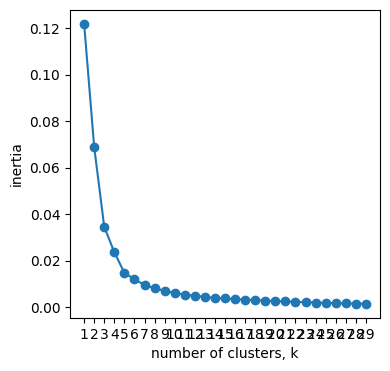

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,30)
inertias = []


# 데이터 읽어오기
data = no_smoke_zon
# 위도 경도 정보 추출
locations = data[["위도", "경도"]]

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(locations)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [47]:
# CSV 파일 읽어오기
data = no_smoke_zon

# 위도 경도 정보 추출
locations = data[['위도', '경도']]
k=20
# K-Means 클러스터링 모델 생성
kmeans = KMeans(n_clusters=k)

# 모델 학습 및 예측
kmeans.fit(locations)
labels = kmeans.predict(locations)

# 결과에 레이블 추가
data['레이블'] = labels

# 클러스터링 결과 중심값 찾기
centers = kmeans.cluster_centers_

# 지도 생성
m = folium.Map(location = [37.5665, 126.9780], zoom_start=12,tiles='Stamen Terrain')

# 군집별 마커 색상 지정
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple', 5: 'brown', 6: 'pink', 7: 'gray', 8: 'beige', 9: 'beige', 
                  10: 'darkred', 11: 'lightred', 12: 'darkblue', 13: 'darkgreen', 14: 'cadetblue', 15: 'darkpurple', 16: 'bluepurple', 17: 'lightblue', 
                  18: 'lightgreen', 19: 'lightgray', 20: 'bluepurple', 21: 'lightgray'}

# 군집별 마커 그리기
for idx, row in data.iterrows():
    label = row['레이블']
    lat = row['위도']
    lng = row['경도']
    popup = row['상호명']
    
    # 색상 지정
    color = cluster_colors[label]
    
    folium.Marker(location=[lat, lng], popup=popup, icon=folium.Icon(color=color)).add_to(m)

# 클러스터 개별 위치와 중심점 사이의 거리 구하기
cnt=0
cluster_cnt={}
for label in range(k):
    cluster_data = data[data['레이블']==label]
    cluster_center = centers[label]
    
    for idx, row in cluster_data.iterrows():
        location = (row['위도'], row['경도'])
        distance = geodesic(location, cluster_center).km
        if distance < 0.1:
            cnt+=1# 거리가 100m 이하인 경우에만 딕셔너리에 추가
            if label not in cluster_cnt:
                cluster_cnt[label] = []
                
            cluster_cnt[label].append({row['상호명']: distance})

        print(f"Cluster {label}, {row['상호명']}: {distance:.2f}km")

for i, center in enumerate(centers):
    popup = f"Cluster {i}"
    folium.Marker(location=center, popup=popup, icon=folium.Icon(color='black')).add_to(m)
    folium.CircleMarker(location=center, radius=70, color='skyblue', popup='흡연구역', fill_color='blue').add_to(m)
    
# 클러스터별 거리 정보 출력
m.save('map 마포.html')


c:\Users\hill3\.conda\envs\homestudy\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hill3\AppData\Local\Temp\ipykernel_18116\2594725000.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['레이블'] = labels
C:\Users\hill3\AppData\Local\Temp\ipykernel_18116\2594725000.py:38: UserWarning: color argument of Icon should be one of: {'red', 'lightgreen', 'beige', 'gray', 'lightred', 'darkgreen', 'lightblue', 'darkpurple', 'white', 'cadetblue', 'orange', 'darkblue', 'black', 'pink', 'purple', 'blue', 'lightgray', 'darkred', 'green'}.
  folium.Marker(location=[lat, lng], popup=popu

Cluster 0, 퍼블릭: 0.11km
Cluster 0, 술이야: 0.11km
Cluster 0, 브롱스: 0.09km
Cluster 0, 가락동리어카포차: 0.02km
Cluster 0, 얼맥당: 0.10km
Cluster 0, 미스틱: 0.08km
Cluster 0, 골목대장: 0.02km
Cluster 0, 포도먹는여우: 0.18km
Cluster 0, 칠성포차: 0.08km
Cluster 0, 생활맥주: 0.12km
Cluster 0, 가비야: 0.08km
Cluster 0, 핫플레이스: 0.12km
Cluster 0, 봉구비어: 0.09km
Cluster 0, 공간: 0.04km
Cluster 0, 주즈브: 0.05km
Cluster 0, 릴리: 0.11km
Cluster 0, 피에스타펍: 0.04km
Cluster 0, 옥이포차: 0.14km
Cluster 0, 모카리아: 0.12km
Cluster 0, 가비야: 0.08km
Cluster 0, 주유소포차: 0.11km
Cluster 0, 바른치킨: 0.18km
Cluster 0, 바람: 0.14km
Cluster 0, 김씨포차: 0.15km
Cluster 0, 뮤씨드: 0.03km
Cluster 0, 글렌: 0.14km
Cluster 1, 담소: 0.20km
Cluster 1, 미향언니포장마차: 0.02km
Cluster 1, 리틀빅: 0.11km
Cluster 1, 토메루: 0.11km
Cluster 1, 50픽: 0.04km
Cluster 1, 밥술랭: 0.05km
Cluster 1, 몹시: 0.17km
Cluster 1, 더에일: 0.04km
Cluster 1, 포차14: 0.02km
Cluster 1, 코케인: 0.12km
Cluster 1, 별난포차: 0.12km
Cluster 1, 달동네포장마차: 0.11km
Cluster 1, 루나와꾸나포차: 0.04km
Cluster 1, 일구팔사: 0.30km
Cluster 1, 수줍은포차: 0.07km
Cluster 1, 브롱스: 0.20km


In [48]:
  
for i in range(1, len(cluster_cnt.keys())):
    if i in cluster_cnt:
        print(f"Key: {i}, Value: {len(cluster_cnt[i])}")
    else:
        print(f"Key: {i}, Value: 0")



Key: 1, Value: 18
Key: 2, Value: 0
Key: 3, Value: 0
Key: 4, Value: 18
Key: 5, Value: 1
Key: 6, Value: 19
Key: 7, Value: 13
Key: 8, Value: 61
Key: 9, Value: 2
Key: 10, Value: 1
Key: 11, Value: 0
Key: 12, Value: 0
Key: 13, Value: 3


In [49]:
sorted_cluster = sorted(cluster_cnt.items(), key=lambda x: len(x[1]), reverse=True)
for key, value in sorted_cluster:
    print(f"클러스터: {key}, 100미터 이내 유흥업소: {len(value)}")


클러스터: 8, 100미터 이내 유흥업소: 61
클러스터: 6, 100미터 이내 유흥업소: 19
클러스터: 1, 100미터 이내 유흥업소: 18
클러스터: 4, 100미터 이내 유흥업소: 18
클러스터: 0, 100미터 이내 유흥업소: 13
클러스터: 7, 100미터 이내 유흥업소: 13
클러스터: 15, 100미터 이내 유흥업소: 5
클러스터: 17, 100미터 이내 유흥업소: 4
클러스터: 13, 100미터 이내 유흥업소: 3
클러스터: 19, 100미터 이내 유흥업소: 3
클러스터: 9, 100미터 이내 유흥업소: 2
클러스터: 18, 100미터 이내 유흥업소: 2
클러스터: 5, 100미터 이내 유흥업소: 1
클러스터: 10, 100미터 이내 유흥업소: 1
